In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd

DATA = 'GiveMeSomeCredit/cs-training.csv'
credit_df = pd.read_csv(DATA, sep=',', encoding='ISO-8859-1')

#Print the dataset:
credit_df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
# Changing column Names for ease of use:
credit_df=credit_df.drop('Unnamed: 0', axis=1)
credit_df.columns = ['Target', 'Revolving', 'Age', '30-59PastDue', 'DbtRatio', 'Income', 'NumOpenLines', 'Num90DayLate', 'NumRealEstLines', '60-89PastDueNoW', 'FamMemb']

In [4]:
credit_df

,Target,Revolving,Age,30-59PastDue,DbtRatio,Income,NumOpenLines,Num90DayLate,NumRealEstLines,60-89PastDueNoW,FamMemb
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [7]:
# Data Cleaning/ Data Preprocessing:

# Checking for missing values:
credit_df.isna().sum().reset_index()

,index,0
0,Target,0
1,Revolving,0
2,Age,0
3,30-59PastDue,0
4,DbtRatio,0
5,Income,29731
6,NumOpenLines,0
7,Num90DayLate,0
8,NumRealEstLines,0
9,60-89PastDueNoW,0


In [8]:
# Checking data distribution for data features:
credit_df['30-59PastDue'].describe().reset_index()
credit_df['60-89PastDueNoW'].describe().reset_index()

,index,60-89PastDueNoW
0,count,150000.000000
1,mean,0.240387
2,std,4.155179
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,98.000000


In [9]:
# Check for the monthly income:
credit_df['Income'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: Income, dtype: float64

In [10]:
# Check for outliers:
# 1 Check for ratios above 1 
print('Revolving of unsecured lines > 1: ', credit_df.loc[credit_df['Revolving'] > 1].count().sum()) # Outliers
print('Revolving of unsecured lines < 0: ', credit_df.loc[credit_df['Revolving'] < 0].count().sum()) 
print('Debt ratio > 1: ', credit_df.loc[credit_df['DbtRatio'] > 1].count().sum()) # Outliers
print('Debt ratio > 1: ', credit_df.loc[credit_df['DbtRatio'] < 0].count().sum())

# Checking for age values superior than 100:
print('Age values exceeding 100 years: ', credit_df.loc[credit_df['Age'] > 100].count().sum()) # Outliers
print('Age values under 18 years: ', credit_df.loc[credit_df['Age'] < 18].count().sum()) # Outliers

# Checking for Days Past Due negative:
print('Negative 30-59 days past due negative: ', credit_df.loc[credit_df['30-59PastDue'] < 0].count().sum()) 
print('Negative 60-80 days past due negative Nw: ', credit_df.loc[credit_df['60-89PastDueNoW'] < 0].count().sum())

# Checking for mortgages and loans non normal values:
print('Number of Open loans < 0: ', credit_df.loc[credit_df['NumOpenLines'] < 0].count().sum())
print('Number of RealEstate loans < 0: ', credit_df.loc[credit_df['NumRealEstLines'] < 0].count().sum())

# Check for number of Dependents:
print('Number of family members < 0: ', credit_df.loc[credit_df['FamMemb'] < 0].count().sum())
print('Number of family members Mean: ', credit_df['FamMemb'].mean())
print('Number of family members Max: ', credit_df['FamMemb'].max()) # Outliers

# Checking for negative values on Income:
print('Negative values in Income: ', credit_df.loc[credit_df['Income'] < 0].count().sum())
print('Mean values in Income: ', credit_df['Income'].mean())
print('Max value in Income: ', credit_df['Income'].max())

Revolving of unsecured lines > 1:  35922
Revolving of unsecured lines < 0:  0
Debt ratio > 1:  355155
Debt ratio > 1:  0
Age values exceeding 100 years:  133
Age values under 18 years:  11
Negative 30-59 days past due negative:  0
Negative 60-80 days past due negative Nw:  0
Number of Open loans < 0:  0
Number of RealEstate loans < 0:  0
Number of family members < 0:  0
Number of family members Mean:  0.7572222678605657
Number of family members Max:  20.0
Negative values in Income:  0
Mean values in Income:  6670.221237392844
Max value in Income:  3008750.0


In [11]:
credit_df.isna().sum()

Target                 0
Revolving              0
Age                    0
30-59PastDue           0
DbtRatio               0
Income             29731
NumOpenLines           0
Num90DayLate           0
NumRealEstLines        0
60-89PastDueNoW        0
FamMemb             3924
dtype: int64

In [12]:
# Cleaning and Removing Outliers:
# 1 Drop Duplicates:
credit_df = credit_df.drop_duplicates(keep='last')

# 2 Drop null values:
credit_df = credit_df.dropna()

# Remove Outliers:
clean_credit = credit_df.loc[credit_df['Revolving'] <= 1]
clean_credit = clean_credit.loc[clean_credit['DbtRatio'] <= 1]
clean_credit = clean_credit.loc[clean_credit['Age'] <= 100]
clean_credit = clean_credit.loc[clean_credit['Age'] >= 18]
clean_credit = clean_credit.loc[clean_credit['FamMemb'] < 20]

clean_credit.isna().sum()

Target             0
Revolving          0
Age                0
30-59PastDue       0
DbtRatio           0
Income             0
NumOpenLines       0
Num90DayLate       0
NumRealEstLines    0
60-89PastDueNoW    0
FamMemb            0
dtype: int64

In [13]:
# Data Normalization: mean 0 and std 1
# Take all columns except Binary Target
values = clean_credit.loc[:, clean_credit.columns != 'Target'].values
values.shape

(110332, 10)

In [14]:
# Normalize values with mean 0 and std 1:
from sklearn import preprocessing

def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm["Target"]=dataset["Target"]
    return dataNorm

In [15]:
# Normalizing the data:
clean_scaled_df = normalize(clean_credit)
clean_scaled_df

,Target,Revolving,Age,30-59PastDue,DbtRatio,Income,NumOpenLines,Num90DayLate,NumRealEstLines,60-89PastDueNoW,FamMemb
0,1,0.766127,0.307692,0.020408,0.802982,0.003031,0.228070,0.000000,0.206897,0.0,0.153846
1,0,0.957151,0.243590,0.000000,0.121876,0.000864,0.070175,0.000000,0.000000,0.0,0.076923
2,0,0.658180,0.217949,0.010204,0.085113,0.001011,0.035088,0.010204,0.000000,0.0,0.000000
3,0,0.233810,0.115385,0.000000,0.036050,0.001097,0.087719,0.000000,0.000000,0.0,0.000000
4,0,0.907239,0.358974,0.010204,0.024926,0.021134,0.122807,0.000000,0.034483,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,0.371795,0.000000,0.404293,0.001130,0.122807,0.000000,0.000000,0.0,0.000000
149995,0,0.040674,0.679487,0.000000,0.225131,0.000698,0.070175,0.000000,0.034483,0.0,0.000000
149996,0,0.299745,0.294872,0.000000,0.716562,0.001856,0.070175,0.000000,0.034483,0.0,0.153846
149998,0,0.000000,0.115385,0.000000,0.000000,0.001900,0.070175,0.000000,0.000000,0.0,0.000000


## Start with Factor Analysis

In [16]:
correl = clean_scaled_df.corr()
correl

,Target,Revolving,Age,30-59PastDue,DbtRatio,Income,NumOpenLines,Num90DayLate,NumRealEstLines,60-89PastDueNoW,FamMemb
Target,1.000000,0.241891,-0.097449,0.121983,0.055725,-0.017242,-0.031320,0.113252,-0.015856,0.097786,0.042720
Revolving,0.241891,1.000000,-0.262549,0.113235,0.157076,-0.032223,-0.165454,0.100742,-0.075096,0.088620,0.083899
Age,-0.097449,-0.262549,1.000000,-0.048909,-0.078455,0.033996,0.179741,-0.047368,0.059836,-0.043652,-0.208706
30-59PastDue,0.121983,0.113235,-0.048909,1.000000,-0.029021,-0.010253,-0.046652,0.979689,-0.026730,0.983245,0.001998
DbtRatio,0.055725,0.157076,-0.078455,-0.029021,1.000000,-0.050526,0.347784,-0.049738,0.516432,-0.045385,0.097163
Income,-0.017242,-0.032223,0.033996,-0.010253,-0.050526,1.000000,0.093678,-0.012974,0.136132,-0.011457,0.063713
NumOpenLines,-0.031320,-0.165454,0.179741,-0.046652,0.347784,0.093678,1.000000,-0.072741,0.419722,-0.063384,0.042419
Num90DayLate,0.113252,0.100742,-0.047368,0.979689,-0.049738,-0.012974,-0.072741,1.000000,-0.042075,0.991798,-0.005019
NumRealEstLines,-0.015856,-0.075096,0.059836,-0.026730,0.516432,0.136132,0.419722,-0.042075,1.000000,-0.036179,0.131419
60-89PastDueNoW,0.097786,0.088620,-0.043652,0.983245,-0.045385,-0.011457,-0.063384,0.991798,-0.036179,1.000000,-0.005824


In [17]:
correl['Target'].sort_values(ascending=False)

Target             1.000000
Revolving          0.241891
30-59PastDue       0.121983
Num90DayLate       0.113252
60-89PastDueNoW    0.097786
DbtRatio           0.055725
FamMemb            0.042720
NumRealEstLines   -0.015856
Income            -0.017242
NumOpenLines      -0.031320
Age               -0.097449
Name: Target, dtype: float64

In [18]:
# Start with Adequacy Test: Check wether the dataset is suitable fro Factor Analysis:
# 1 Check the Barlett's Test of sphericity:
from scipy.stats import chi2, pearsonr
import numpy as np

def barlett_test(frame: pd.DataFrame):
    # print datafram info:
    frame.info()
    
    col, row = frame.shape
    x_corr = frame.corr()

    corr_det = np.linalg.det(x_corr)
    chi_measure = -np.log(corr_det) * (col - 1 - (2 * row + 5) / 6)
    degrees_of_freedom = row * (row - 1) / 2
    p_value = chi2.sf(chi_measure, degrees_of_freedom)
    return chi_measure, p_value

chi_square, p_value = barlett_test(clean_scaled_df)
chi_square, p_value ## Highly Suitable: OBSERVED Correlation != Identity Matrix Validating (H0, H1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110332 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Target           110332 non-null  int64  
 1   Revolving        110332 non-null  float64
 2   Age              110332 non-null  float64
 3   30-59PastDue     110332 non-null  float64
 4   DbtRatio         110332 non-null  float64
 5   Income           110332 non-null  float64
 6   NumOpenLines     110332 non-null  float64
 7   Num90DayLate     110332 non-null  float64
 8   NumRealEstLines  110332 non-null  float64
 9   60-89PastDueNoW  110332 non-null  float64
 10  FamMemb          110332 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 10.1 MB


(944303.1475034575, 0.0)

In [19]:
from factor_analyzer import FactorAnalyzer

# Choose the number of factors:
target = clean_scaled_df['Target']
clean_scaled_df = clean_scaled_df.loc[:, clean_scaled_df.columns != 'Target']

fa = FactorAnalyzer()
fa.fit(clean_scaled_df)

# EigenValues:
ev, v = fa.get_eigenvalues()
eigen_values = pd.DataFrame(ev, columns=['EigenValues'])
eigen_values

,EigenValues
0,3.011205
1,1.889420
2,1.458951
3,1.057358
4,0.878225
5,0.691168
6,0.578973
7,0.405342
8,0.021587
9,0.007771


In [20]:
fa.loadings_

array([[ 5.23549007e-02, -7.43294860e-02,  4.79011561e-01],
       [ 1.31122377e-02,  1.12743487e-01, -5.60599687e-01],
       [ 9.86493985e-01,  2.85475327e-02,  2.53098219e-02],
       [-1.61723936e-02,  6.53110663e-01,  3.55137745e-01],
       [ 3.40124648e-03,  1.03297714e-01, -6.24647218e-02],
       [ 2.78219024e-03,  5.95148779e-01, -1.60386496e-01],
       [ 9.93342302e-01,  4.20786432e-04,  1.06325584e-02],
       [ 2.21442687e-02,  7.67894215e-01,  8.19081024e-02],
       [ 9.98430437e-01,  1.13469368e-02, -7.35969341e-04],
       [-1.69452768e-02,  1.17382019e-01,  2.67001397e-01]])

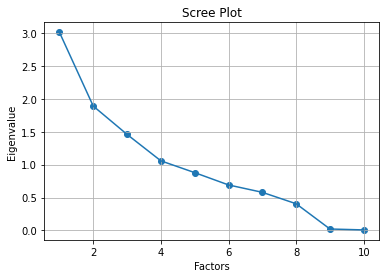

In [21]:
import matplotlib.pyplot as plt

plt.scatter(range(1,clean_scaled_df.shape[1]+1),ev)
plt.plot(range(1,clean_scaled_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [22]:
fac_rotation = FactorAnalyzer(4, rotation="varimax", method='minres', use_smc=True)
fac_rotation.fit(clean_scaled_df)

fac_rotation.get_factor_variance()

(array([2.95403928, 1.56621545, 0.8045773 , 0.43385216]),
 array([0.29540393, 0.15662155, 0.08045773, 0.04338522]),
 array([0.29540393, 0.45202547, 0.5324832 , 0.57586842]))

In [23]:
# Diplsaying correlate factors with Original Observable Features:
loadings = pd.DataFrame(fac_rotation.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index=clean_scaled_df.columns)
loadings

,Factor 1,Factor 2,Factor 3,Factor 4
Revolving,0.078041,0.005405,0.426747,-0.180058
Age,-0.014813,0.068073,-0.625083,-0.011333
30-59PastDue,0.984603,-0.010935,0.057575,-0.012565
DbtRatio,-0.033288,0.936567,0.237444,-0.254646
Income,-0.003860,0.037480,-0.028517,0.275342
NumOpenLines,-0.032651,0.499802,-0.242821,0.265598
Num90DayLate,0.991962,-0.036957,0.049594,-0.022388
NumRealEstLines,-0.011023,0.650263,-0.033196,0.347658
60-89PastDueNoW,0.995907,-0.028893,0.038362,-0.015043
FamMemb,-0.012548,0.089587,0.327464,0.261442


In [24]:
# Transform FA features:
new_data_frame = fac_rotation.transform(clean_scaled_df)
print(new_data_frame.shape)

(110332, 4)


In [25]:
credit_scoring_final = pd.DataFrame(new_data_frame, columns=['Financial_Struggle', 'Finance_Requirements', 'Expendable_Income', 'Behavioral_LifeStyle'])
credit_scoring_final

,Financial_Struggle,Finance_Requirements,Expendable_Income,Behavioral_LifeStyle
0,0.074509,2.591921,0.908499,1.482201
1,-0.124592,-1.177996,0.804078,-0.210217
2,-0.019714,-1.293848,0.701497,-0.394392
3,-0.119098,-1.371602,0.386891,0.063100
4,-0.030287,-1.065164,0.179817,1.031922
...,...,...,...,...
110327,-0.082358,0.141346,0.165513,-1.049349
110328,-0.034148,-0.237808,-0.971991,-0.358910
110329,-0.096734,1.391638,1.068961,-1.148509
110330,-0.118204,-1.467253,0.248312,0.166460


## ML Developement

In [26]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Split the Data: 75/25
X = credit_scoring_final

x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=56)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.00026366508987303583, class_weight=None, dual=False, max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
random_state=None, solver='saga')
model.fit(x_train, y_train)

LogisticRegression(C=0.00026366508987303583, penalty='l1', solver='saga')

In [28]:
predictions = model.predict(x_test)

In [29]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score, classification_report

test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9392741906246601

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25908
           1       0.00      0.00      0.00      1675

    accuracy                           0.94     27583
   macro avg       0.47      0.50      0.48     27583
weighted avg       0.88      0.94      0.91     27583



/home/aymane/anaconda3/envs/neptune/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aymane/anaconda3/envs/neptune/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aymane/anaconda3/envs/neptune/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [32]:
## Extreme Gradient Boosting:

## Enable Neptune Integration:
# Setting up the project and Initializing:
import neptune


neptune.init(project_qualified_name='aymane.hachcham/CreditScoring', api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiYTc1YzgyODktZDJlZC00ZDIxLTg5NzMtZTE2YjFlNjM3ODczIn0=')

Project(aymane.hachcham/CreditScoring)

In [376]:
# Set up the params:
import neptune
from neptunecontrib.monitoring.xgboost import neptune_callback

params = {
    'max_depth':5,
    'learning_rate':0.1,
    'objective': 'multi:softprob',
    'n_jobs':-1, 
    'num_class':2, 
    'eta':0.5,
    'gamma': 0.1,
    'lambda':1,
    'alpha':0.35, 
}

neptune.create_experiment(
    name='CreditScoring XGB',
    tags=['XGBoost', 'Credit Scoring'],
    params=params
)

https://ui.neptune.ai/aymane.hachcham/CreditScoring/e/CRED-1


Experiment(CRED-1)

In [34]:
import xgboost as xgb

# DTrain Matrix
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [378]:
watchlist = [(dtest, 'test'), (dtrain, 'train')]
num_round = 200

xgb.train(params, dtrain, num_round, watchlist, callbacks=[neptune_callback()])

neptune.stop()

/home/aymane/anaconda3/envs/neptune/lib/python3.6/site-packages/xgboost/training.py:20: UserWarning:

Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html



[15:54:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	test-mlogloss:0.61660	train-mlogloss:0.61630
[1]	test-mlogloss:0.55391	train-mlogloss:0.55337
[2]	test-mlogloss:0.50191	train-mlogloss:0.50110
[3]	test-mlogloss:0.45821	train-mlogloss:0.45716
[4]	test-mlogloss:0.42107	train-mlogloss:0.41980
[5]	test-mlogloss:0.38933	train-mlogloss:0.38785
[6]	test-mlogloss:0.36206	train-mlogloss:0.36043
[7]	test-mlogloss:0.33859	train-mlogloss:0.33677
[8]	test-mlogloss:0.31824	train-mlogloss:0.31626
[9]	test-mlogloss:0.30055	train-mlogloss:0.29844
[10]	test-mlogloss:0.28520	train-mlogloss:0.28294
[11]	test-mlogloss:0.27178	train-mlogloss:0.26938
[12]	test-mlogloss:0.26010	train-mlogloss:0.25753
[13]	test-mlogloss:0.24990	train-mlogloss:0.24718
[14]	test-mlogloss:0.24096	train-mlogloss:0.23807
[15]	te

[158]	test-mlogloss:0.17875	train-mlogloss:0.16130
[159]	test-mlogloss:0.17876	train-mlogloss:0.16124
[160]	test-mlogloss:0.17881	train-mlogloss:0.16111
[161]	test-mlogloss:0.17881	train-mlogloss:0.16106
[162]	test-mlogloss:0.17881	train-mlogloss:0.16097
[163]	test-mlogloss:0.17881	train-mlogloss:0.16093
[164]	test-mlogloss:0.17882	train-mlogloss:0.16086
[165]	test-mlogloss:0.17882	train-mlogloss:0.16082
[166]	test-mlogloss:0.17882	train-mlogloss:0.16070
[167]	test-mlogloss:0.17883	train-mlogloss:0.16062
[168]	test-mlogloss:0.17883	train-mlogloss:0.16057
[169]	test-mlogloss:0.17885	train-mlogloss:0.16051
[170]	test-mlogloss:0.17885	train-mlogloss:0.16050
[171]	test-mlogloss:0.17885	train-mlogloss:0.16046
[172]	test-mlogloss:0.17885	train-mlogloss:0.16038
[173]	test-mlogloss:0.17887	train-mlogloss:0.16032
[174]	test-mlogloss:0.17890	train-mlogloss:0.16023
[175]	test-mlogloss:0.17889	train-mlogloss:0.16019
[176]	test-mlogloss:0.17889	train-mlogloss:0.16013
[177]	test-mlogloss:0.17888	tra

In [70]:
params3 = {
    'max_depth':10,
    'learning_rate':0.001,
    'colsample_bytree': 0.7,
    'subsample':0.5,
    'n_estimator': 1000, 
    'objective': 'multi:softprob',
    'num_class':2,
    'eval_metric': 'merror'
}

watchlist = [(dtest, 'eval'), (dtrain, 'train')]


neptune.create_experiment(
    name='CreditScoring XGB V3',
    tags=['XGBoost', 'Credit Scoring', 'v3'],
    params=params3
)

https://ui.neptune.ai/aymane.hachcham/CreditScoring/e/CRED-8


Experiment(CRED-8)

In [73]:
# Training the second XGBoost version:
import xgboost as xgb
import neptune
from neptunecontrib.monitoring.xgboost import neptune_callback

train_rounds = 100
xgb.train(params2, dtrain, train_rounds, watchlist,
          callbacks=[neptune_callback(log_tree=[0,1,2])])

[0]	eval-merror:0.06062	train-merror:0.05944


/home/aymane/anaconda3/envs/neptune/lib/python3.6/site-packages/xgboost/training.py:20: UserWarning: Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html
  warnings.warn(f'Old style callback is deprecated.  See: {link}', UserWarning)


[1]	eval-merror:0.06047	train-merror:0.05951
[2]	eval-merror:0.06040	train-merror:0.05929
[3]	eval-merror:0.06033	train-merror:0.05902
[4]	eval-merror:0.06015	train-merror:0.05808
[5]	eval-merror:0.06044	train-merror:0.05923
[6]	eval-merror:0.06033	train-merror:0.05819
[7]	eval-merror:0.06022	train-merror:0.05843
[8]	eval-merror:0.06026	train-merror:0.05842
[9]	eval-merror:0.06033	train-merror:0.05766
[10]	eval-merror:0.06015	train-merror:0.05778
[11]	eval-merror:0.06007	train-merror:0.05770
[12]	eval-merror:0.05993	train-merror:0.05686
[13]	eval-merror:0.05989	train-merror:0.05762
[14]	eval-merror:0.06011	train-merror:0.05688
[15]	eval-merror:0.06004	train-merror:0.05676
[16]	eval-merror:0.05960	train-merror:0.05605
[17]	eval-merror:0.05938	train-merror:0.05584
[18]	eval-merror:0.05953	train-merror:0.05581
[19]	eval-merror:0.05975	train-merror:0.05545
[20]	eval-merror:0.05989	train-merror:0.05569
[21]	eval-merror:0.05975	train-merror:0.05535
[22]	eval-merror:0.05971	train-merror:0.054

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.873926 to fit


[99]	eval-merror:0.05982	train-merror:0.04493


NameError: name 'npetune' is not defined

In [74]:
neptune.stop()

In [35]:
# Final Test for XGBoost:

params_attempt3 = {
    'max_depth':10,
    'learning_rate':0.001,
    'colsample_bytree': 0.7,
    'subsample':0.8,
    'gamma': 0.3,
    'alpha':0.35,
    'n_estimator': 500, 
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

watchlist = [(dtest, 'eval'), (dtrain, 'train')]


neptune.create_experiment(
    name='CreditScoring XGB V3',
    tags=['XGBoost', 'Credit Scoring', 'v3'],
    params=params_attempt3
)

https://ui.neptune.ai/aymane.hachcham/CreditScoring/e/CRED-13


Experiment(CRED-13)

In [37]:
# Xgb classifier:
import xgboost as xgb
import neptune
from neptunecontrib.monitoring.xgboost import neptune_callback

xgb_classifer = xgb.XGBClassifier(**params_attempt3)
xgb_classifer.fit(
    x_train, 
    y_train, 
    eval_set=[(x_test, y_test)],
    callbacks=[neptune_callback(log_tree=[0, 1])])

neptune.stop()

/home/aymane/anaconda3/envs/neptune/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/aymane/anaconda3/envs/neptune/lib/python3.6/site-packages/xgboost/training.py:20: UserWarning: Old style callback is deprecated.  See: https://xgboost.readthedocs.io/en/latest/python/callbacks.html
  warnings.warn(f'Old style callback is deprecated.  See: {link}', UserWarning)


[17:03:25] WARNING: ../src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.06207
[1]	validation_0-error:0.06069
[2]	validation_0-error:0.06080
[3]	validation_0-error:0.06065
[4]	validation_0-error:0.06040
[5]	validation_0-error:0.06069
[6]	validation_0-error:0.06055
[7]	validation_0-error:0.06062
[8]	validation_0-error:0.06058
[9]	validation_0-error:0.06036
[10]	validation_0-error:0.06065
[11]	validation_0-error:0.06062
[12]	validation_0-error:0.06065
[13]	validation_0-error:0.06062
[14]	validation_0-error:0.06051
[15]	validation_0-error:0.06058
[16]	validation_0-error:0.06062
[17]	validation_0-error:0.06062
[18]	validation_0-error:0.06062
[19]	validation_0-error:0.06062
[20]	validation_0-error:0.06062
[21]	va

In [38]:
# print Accuracy on training and testing datasets:
print('Accuracy on Trainig Set: ', xgb_classifer.score(x_train, y_train))
print('Accuracy on Testing Set: ', xgb_classifer.score(x_test[x_train.columns], y_test))

Accuracy on Trainig Set:  0.9400959528211821
Accuracy on Testing Set:  0.9393829532683174


In [39]:
from sklearn.metrics import classification_report,confusion_matrix

predict = xgb_classifer.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25908
           1       0.71      0.00      0.01      1675

    accuracy                           0.94     27583
   macro avg       0.83      0.50      0.49     27583
weighted avg       0.93      0.94      0.91     27583



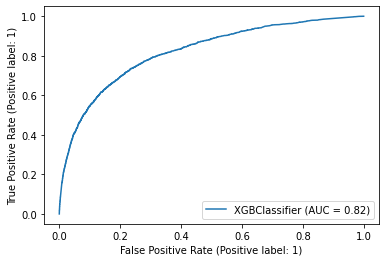

In [42]:
# Plot ROC curve and Confusion Matrix:
from sklearn import metrics

metrics.plot_roc_curve(xgb_classifer, x_test, y_test) 

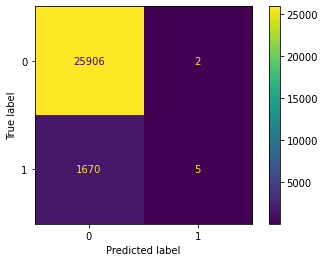

In [52]:
# Displaying the Confusion Matrix:
metrics.plot_confusion_matrix(xgb_classifer, x_test, y_test)

In [44]:
# Using Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
preds = classifier.predict(x_test)
preds

array([0, 1, 0, ..., 0, 1, 0])

In [47]:
# Display the Accuracy Score:
print('Accuracy Score: ', metrics.accuracy_score(y_test, preds))

Accuracy Score:  0.9035275350759526


In [48]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     25908
           1       0.22      0.23      0.22      1675

    accuracy                           0.90     27583
   macro avg       0.58      0.59      0.59     27583
weighted avg       0.91      0.90      0.90     27583



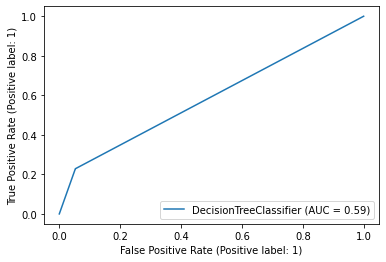

In [49]:
# Dislpaying ROC Curve and Confusion Matrix:
metrics.plot_roc_curve(classifier, x_test, y_test)

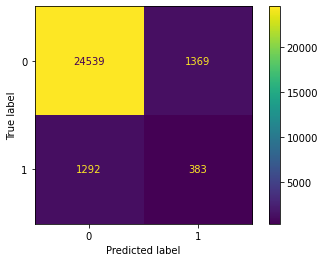

In [50]:
# Display Confusion matrix:
metrics.plot_confusion_matrix(classifier, x_test, y_test)